**<font size=5> Module Title: Machine Learning for AI </font>**

**<font size=5> Assessment Title: ML_CA1 </font>**

**<font size=4> Lecturer Name: Dr. David McQuaid </font>**

**<font size=4> Student Name: Chia Hua Lin &emsp; &emsp; ID: 2020044 </font>**

**<font size=3> GitHub Link: https://github.com/Awa25/ML_CA1 </font>**

### Scenario:

This is a data set which contains over 65K attempts to access a firewall. There is a single categorical feature “Action”, that contains 4 categories – “allow, deny, drop, reset-both”.
Your task is to create a classification model that will predict the class of incoming traffic to the firewall.

### Requirements

You are required to use the dataset contained within the file “log2.csv” and then perform the following analysis by testing at least 2 classification algorithms:

- Perform an initial analysis of the data (EDA) using python in your Jupyter notebook. Discuss your findings and what relevance they might have on your planned classification algorithms. [0-20]
- Perform any preparation of the data, that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.[0-30]
- Create and implement at least 2 classification algorithms that will output a classification based on the Action: (class attribute) feature. Test these models and try to improve it as you see fit. Discuss your findings and final rational for choosing a particular classification algorithm.[0-40]
- Make a classification using your test data, using your final classification algorithm and comment on the accuracy differential between the training and testing set.[0-10]

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [42]:
# Load the dataset
data = pd.read_csv('log2.csv')

# Display the first few rows of the dataset
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [43]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64


In [44]:
# Summary statistics
summary_stats = data.describe()
print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
         Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
count  65532.000000      65532.000000     65532.000000          65532.000000   
mean   49391.969343      10577.385812     19282.972761           2671.049930   
std    15255.712537      18466.027039     21970.689669           9739.162278   
min        0.000000          0.000000         0.000000              0.000000   
25%    49183.000000         80.000000         0.000000              0.000000   
50%    53776.500000        445.000000      8820.500000             53.000000   
75%    58638.000000      15000.000000     38366.250000            443.000000   
max    65534.000000      65535.000000     65535.000000          65535.000000   

              Bytes    Bytes Sent  Bytes Received       Packets  \
count  6.553200e+04  6.553200e+04    6.553200e+04  6.553200e+04   
mean   9.712395e+04  2.238580e+04    7.473815e+04  1.028660e+02   
std    5.618439e+06  3.828139e+06    2.463208e+06  5.133

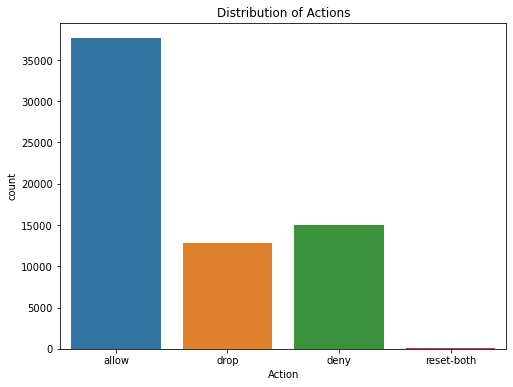

In [45]:
# Visualizing the distribution of the target variable 'Action'
plt.figure(figsize=(8, 6))
sns.countplot(x='Action', data=data)
plt.title('Distribution of Actions')
plt.show()

In [46]:
# Encoding categorical target variable 'Action'
label_encoder = LabelEncoder()
data['Action'] = label_encoder.fit_transform(data['Action'])

In [47]:
# Splitting data into features and target variable
X = data.drop(columns = ['Action'])
y = data['Action']

In [48]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
# Initializing and fitting Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(X_train, y_train)

# Predicting on test data
dt_pred = dt_classifier.predict(X_test)

# Evaluating the model
dt_accuracy = accuracy_score(y_test, dt_pred)

print("Decision Tree Classifier Accuracy:", dt_accuracy)

Decision Tree Classifier Accuracy: 0.9983978027008469
